# Airbnb Tokyo, Japan

In [1]:
# ref : https://towardsdatascience.com/data-cleaning-and-eda-on-airbnb-dataset-with-python-pandas-and-seaborn-7c276116b650
import pandas as pd
import numpy as np
listings = pd.read_csv("listings_tokyo.csv")
print(listings.shape)

(10414, 74)


In [61]:
#listings.info()

In [62]:
listings[
    ["price","host_response_rate","host_acceptance_rate"]
].dtypes

price                   object
host_response_rate      object
host_acceptance_rate    object
dtype: object

In [63]:
listings[
    ["price","host_response_rate","host_acceptance_rate"]
].head()

,price,host_response_rate,host_acceptance_rate
0,"$11,000.00",100%,100%
1,"$7,950.00",NaN,NaN
2,"$3,000.00",100%,NaN
3,"$32,571.00",100%,50%
4,"$11,286.00",100%,100%


In [64]:
# removing $ and %
listings["price"] = listings["price"].str[1:].str.replace(",","").astype("float")
listings["host_response_rate"] = listings["host_response_rate"].str[:-1].astype("float") / 100
listings["host_acceptance_rate"] = listings["host_acceptance_rate"].str[:-1].astype("float") / 100

In [65]:
listings[
    ["price","host_response_rate","host_acceptance_rate"]
].head()

,price,host_response_rate,host_acceptance_rate
0,11000.0,1.0,1.0
1,7950.0,NaN,NaN
2,3000.0,1.0,NaN
3,32571.0,1.0,0.5
4,11286.0,1.0,1.0


In [66]:
listings[["bathrooms_text"]].head()

,bathrooms_text
0,1 bath
1,1 shared bath
2,1 shared bath
3,1 bath
4,2.5 baths


In [67]:
# spliting number of bathrooms and the type of bathroom
listings["bathroom_qty"] = listings["bathrooms_text"].str.split(" ", expand=True)[0]
listings["bathroom_type"] = listings["bathrooms_text"].str.split(" ", expand=True)[1]

In [68]:
listings[["bathrooms_text","bathroom_qty", "bathroom_type"]].head()

,bathrooms_text,bathroom_qty,bathroom_type
0,1 bath,1,bath
1,1 shared bath,1,shared
2,1 shared bath,1,shared
3,1 bath,1,bath
4,2.5 baths,2.5,baths


## Exploratory data analysis

In [69]:
import seaborn as sns
sns.set_theme(font_scale=1.5, style="darkgrid")

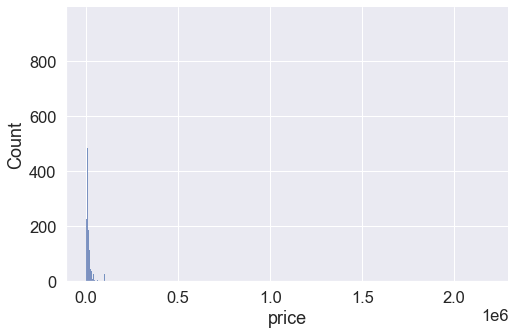

In [70]:
sns.displot(data=listings, x="price", kind="hist", aspect=1.5)

### Price

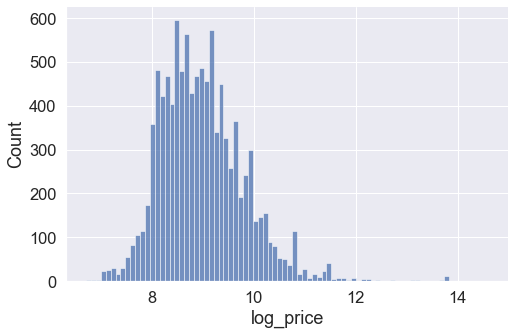

In [71]:
listings = listings[listings.price!=0]
listings.loc[:,"log_price"] = np.log(listings.loc[:,"price"])
sns.displot(data=listings, x="log_price", kind="hist", aspect=1.5)

### Host

In [72]:
listings.groupby(
    ["host_identity_verified"], 
    as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
)

,host_identity_verified,avg_price,qty
0,f,15686.491356,1099
1,t,13253.723356,9261


In [74]:
listings.groupby(
    ["host_response_time"], as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
).sort_values(
    by="avg_price", ascending=False
).reset_index(drop=True)

,host_response_time,avg_price,qty
0,a few days or more,18319.420168,119
1,within a few hours,13723.403756,639
2,within a day,13335.744125,383
3,within an hour,11800.692691,6430


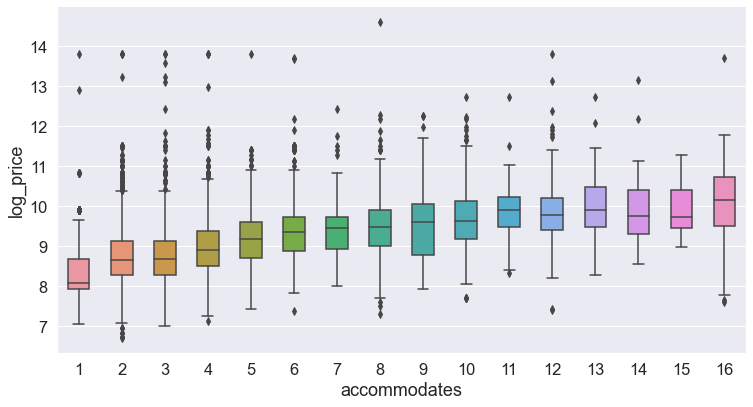

In [75]:
sns.catplot(
    data=listings, 
    x='accommodates', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

### Availability

In [76]:
listings[[ 
    'availability_30', 'availability_60', 
    'availability_90', 'availability_365',
    'log_price'
]].corr()

,availability_30,availability_60,availability_90,availability_365,log_price
availability_30,1.000000,0.928507,0.848068,0.399342,-0.069844
availability_60,0.928507,1.000000,0.961889,0.484061,-0.121928
availability_90,0.848068,0.961889,1.000000,0.557341,-0.142949
availability_365,0.399342,0.484061,0.557341,1.000000,-0.067850
log_price,-0.069844,-0.121928,-0.142949,-0.067850,1.000000


In [77]:
listings.groupby(
    ['instant_bookable'], as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
)

,instant_bookable,avg_price,qty
0,f,12885.723225,2493
1,t,13684.180747,7895


### Type of the place

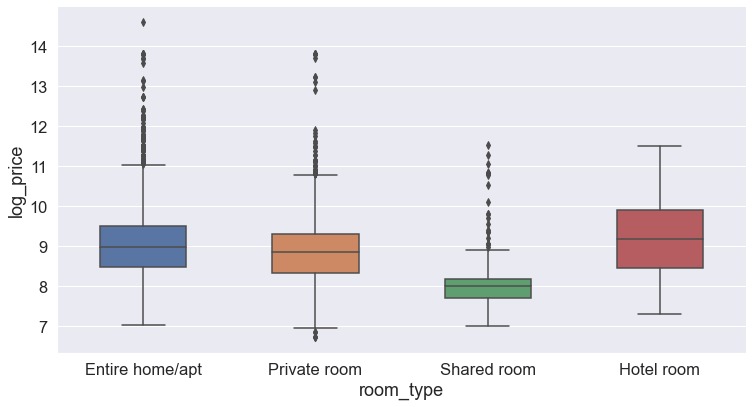

In [78]:
sns.catplot(
    data=listings, 
    x='room_type', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

### Amenities

In [82]:
listings.loc[:,"has_coffee_maker"] = ['coffee maker' in row.lower() for row in listings.amenities]
listings.loc[:,"has_breakfast"] = ['breakfast' in row.lower() for row in listings.amenities]

In [83]:
listings.has_breakfast.value_counts()

False    10098
True       290
Name: has_breakfast, dtype: int64

In [84]:
listings.groupby(
    ["has_breakfast"]
).agg(
    avg_price = ("price", "mean")
)

,avg_price
has_breakfast,
False,13067.957021
True,28277.534483


### Location

In [88]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10388 entries, 0 to 10413
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10388 non-null  int64  
 1   listing_url                                   10388 non-null  object 
 2   scrape_id                                     10388 non-null  int64  
 3   last_scraped                                  10388 non-null  object 
 4   name                                          10388 non-null  object 
 5   description                                   10388 non-null  object 
 6   neighborhood_overview                         7756 non-null   object 
 7   picture_url                                   10388 non-null  object 
 8   host_id                                       10388 non-null  int64  
 9   host_url                                      10388 non-null 

In [89]:
listings[
    ["neighbourhood","neighbourhood_cleansed", "neighbourhood_group_cleansed"]
].head()

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,NaN,Sumida Ku,NaN
1,"Kita-ku, Tokyo, Japan",Kita Ku,NaN
2,"足立区, 東京都, Japan",Adachi Ku,NaN
3,NaN,Shibuya Ku,NaN
4,"Katsushika, Tokyo, Japan",Katsushika Ku,NaN


In [90]:
listings.groupby(
    ["neighbourhood_cleansed"], as_index=False
).agg(
    avg_price = ("price", "mean"),
    qty = ("price", "count")
).sort_values(
    by="avg_price", ascending=False
).reset_index(drop=True)

,neighbourhood_cleansed,avg_price,qty
0,Edogawa Ku,34719.206452,155
1,Shinagawa Ku,24206.187166,187
2,Chiyoda Ku,22702.205405,185
3,Komae Shi,22600.000000,4
4,Nakano Ku,21835.905109,274
5,Minato Ku,18606.141876,437
6,Chuo Ku,18517.597156,422
7,Mitaka Shi,16911.777778,9
8,Shibuya Ku,15383.458545,591
9,Akiruno Shi,15006.692308,13


In [91]:
listings[listings.neighbourhood_cleansed=="Edogawa Ku"].groupby(
    ["neighbourhood"]
).agg(
    avg_price = ("price", "mean"),
    qty = ("price", "count")
).sort_values(
    by="avg_price", ascending=False
)

,avg_price,qty
neighbourhood,,
"Edogawa City, Tōkyō-to, Japan",111631.666667,39
"江戸川区, 東京都, Japan",19767.750000,4
"江户川区, 東京都, Japan",14714.500000,2
"Edogawa, Tokyo, Japan",14667.500000,4
"Edogawa, Tōkyō, Japan",13143.000000,1
"Edogawa-ku, Tōkyō-to, Japan",9224.545455,44
"Edogawa City, Tōkyō, Japan",9000.000000,1
"Edogawa City, Tokyo, Japan",8073.750000,20
"江戸川区, Tokyo, Japan",8000.000000,1
